# Analyze and plot data

## Setup

In [1]:
import glob
import pickle

import matplotlib.pyplot as plt
import numpy as np

In [2]:
evals_raw_fname = "expectation_values_raw.pkl"
evals_encoded_fname = "expectation_values_encoded.txt"
evals_dd_fname = "expectation_values_encoded_dd.txt"

## Select data

In [3]:
# Load experiment data matching these parameters.
depths = np.arange(0, 100 + 1, 10)
pattern = "memory_steane_zero_state_z_ibm_kyiv*"

## Load data

In [4]:
all_evals_raw = []
all_evals_encoded = []
all_evals_dd = []
for dir in glob.glob(pattern):
    if not np.allclose(depths, np.loadtxt(f"{dir}/depths.txt")):
        continue

    with open(f"{dir}/{evals_raw_fname}", "rb") as f:
        all_evals = pickle.load(f)

    all_evals_raw.append(np.array(list(all_evals.values())).mean(axis=0))
    all_evals_encoded.append(np.loadtxt(f"{dir}/{evals_encoded_fname}"))
    all_evals_dd.append(np.loadtxt(f"{dir}/{evals_dd_fname}"))

ntrials = len(all_evals_raw)
print(f"Loaded data from {ntrials} experiment(s).")

Loaded data from 10 experiment(s).


In [5]:
all_evals_raw = np.array(all_evals_raw)
all_evals_encoded = np.array(all_evals_encoded)
all_evals_dd = np.array(all_evals_dd)

evals_raw_avg = np.average(all_evals_raw, axis=0)
evals_encoded_avg = np.average(all_evals_encoded, axis=0)
evals_dd_avg = np.average(all_evals_dd, axis=0)

evals_raw_std = np.std(all_evals_raw, axis=0, ddof=1)
evals_encoded_std = np.std(all_evals_encoded, axis=0, ddof=1)
evals_dd_std = np.std(all_evals_encoded, axis=0, ddof=1)

## Plot

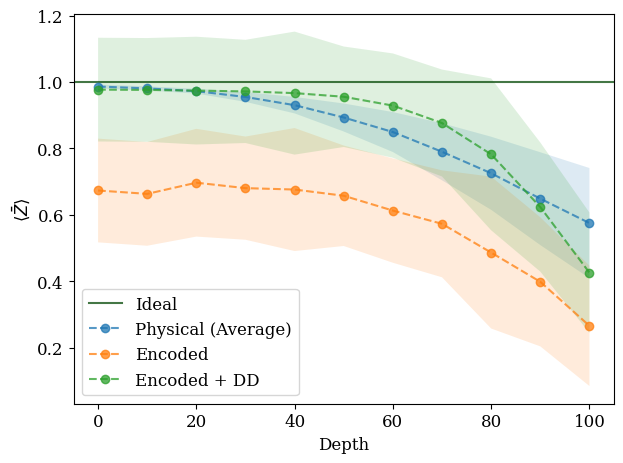

In [6]:
plt.rcParams.update({"font.family": "serif", "font.size": 12})
colors = ["xkcd:blue", "xkcd:orange", "xkcd:red"]
alpha: float = 0.75

plt.axhline(1.0, label="Ideal", alpha=alpha, color="xkcd:darkgreen")
plt.plot(depths, evals_raw_avg, "--o", alpha=alpha, label="Physical (Average)")
plt.fill_between(depths, y1=evals_raw_avg - evals_raw_std, y2=evals_raw_avg + evals_raw_std, alpha=0.15)
# plt.plot(depths, all_evals[121], "--o", alpha=alpha, label="Physical (Best)")
plt.plot(depths, evals_encoded_avg, "--o", alpha=alpha, label="Encoded")
plt.fill_between(depths, y1=evals_encoded_avg - evals_encoded_std, y2=evals_encoded_avg + evals_encoded_std, alpha=0.15)
plt.plot(depths, evals_dd_avg, "--o", alpha=alpha, label="Encoded + DD")
plt.fill_between(depths, y1=evals_dd_avg - evals_dd_std, y2=evals_dd_avg + evals_dd_std, alpha=0.15)

plt.ylabel(r"$\langle \bar{Z} \rangle$")
plt.xlabel("Depth")

plt.tight_layout()
plt.legend();
# plt.savefig("color_code_distance_three_memory_z_averages.pdf")